<a href="https://colab.research.google.com/github/JJ-T/JJ-T/blob/main/Investigating_Dataset_UFO_Sightings_Session_54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries #
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # matplotlib for plotting
import seaborn as sns  # seaborn to help with visualizations

In [ ]:
#Open UFO data
ufo_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/UFO_Sightings_Dataset.csv',
                  low_memory=False,
                  na_values = ['UNKNOWN','UNK'], 
                  na_filter = True, 
                  skip_blank_lines = True)

In [ ]:
type(ufo_df)

pandas.core.frame.DataFrame

In [ ]:
# Choose columns to work with based on our initial questions
ufo_subcols = ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
               'comments', 'date posted', 'latitude', 'longitude ']

ufo_df = pd.DataFrame(data=ufo_df, columns=ufo_subcols)

In [ ]:
ufo_df.shape

(80332, 10)

In [ ]:
ufo_df

In [ ]:
ufo_df.tail()

In [ ]:
ufo_df.info()

In [ ]:
sns.heatmap(ufo_df.isnull(), yticklabels= False, cbar = True, cmap = 'viridis')

#sns.heatmap(<dataframe_df_name>.isnull(), yticklabels= False, cbar = True, cmap = 'viridis')

In [ ]:
nullValues = ufo_df.isnull().sum()
nullPercent = (nullValues / len(ufo_df))*100
print(' Null Values (% of entries):')
print(round(nullPercent.sort_values(ascending=False),2))

In [ ]:
ufo_df['datetime'] = ufo_df['datetime'].str.replace('24:00', '0:00') #converts 24:00 to 0:00
ufo_df['month'] = pd.DatetimeIndex(ufo_df['datetime']).month #creates column 'month' stripping the year from datetime_zero
ufo_df['year'] = pd.DatetimeIndex(ufo_df['datetime']).year #creates column 'year' stripping the year from datetime_zero
ufo_df['day'] = pd.DatetimeIndex(ufo_df['datetime']).day #creates column 'day' stripping the year from datetime_zero
ufo_df['hour'] = pd.DatetimeIndex(ufo_df['datetime']).hour #creates column 'hour' stripping the year from datetime_zero
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'], errors='coerce')

In [ ]:
ufo_df.head()

In [ ]:
ufo_df.shape

(80332, 14)

## Code for Session No 53 

> Let's see how UFO reportings have changed in the last 70 years

In [ ]:
type(ufo_df)

pandas.core.frame.DataFrame

In [ ]:
years_data = ufo_df['year'].value_counts()
years_index = years_data.index  
years_values = years_data.values

In [ ]:
years_data

2012    7357
2013    7037
2011    5107
2008    4820
2009    4541
        ... 
1934       1
1906       1
1941       1
1916       1
1920       1
Name: year, Length: 87, dtype: int64

In [ ]:
type(years_data)

pandas.core.series.Series

In [ ]:
years_data.get(2000)

2772

# we see a large increase of sightings at the beginning of the 90's
# I indicated the start of the X-Files TV show for reference 1985

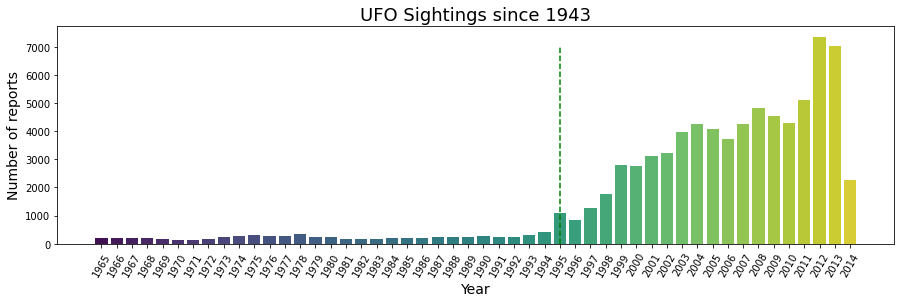

In [ ]:
plt.figure(figsize=(15,4))
plt.xticks(rotation =60)
plt.title('UFO Sightings since 1943', fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
years_plot = sns.barplot(x=years_index[:50],y=years_values[:50], palette = "viridis")

plt.vlines(30, 0, 7000, linestyles ="dashed", colors ="g") 
plt.show()

In [ ]:
def month_conversion(m):
    if m in range(3,6):
        return "Spring"
    elif m in range(6,9):
        return "Summer"
    elif m in range(9,12):
        return "Autumn"
    elif m == 12 or m == 1 or m == 2:
        return "Winter"
    
season_order = ["Spring", "Summer", "Autumn", "Winter"]

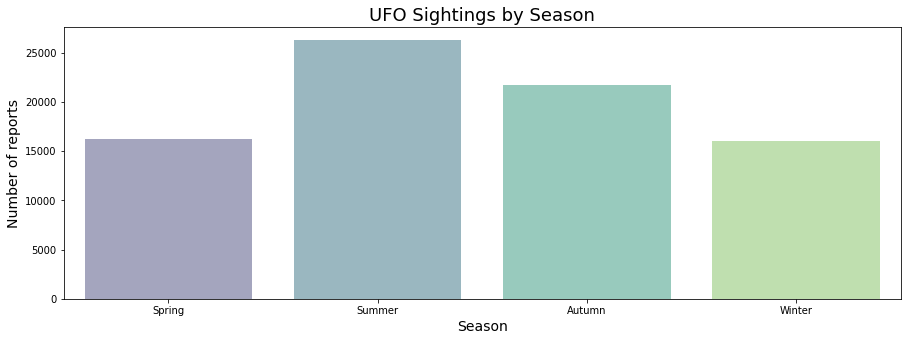

In [ ]:
ufo_df["Season"] = ufo_df['month'].apply(month_conversion)
season_stat = ufo_df["Season"].value_counts()
season_index = season_stat.index
season_value = season_stat.values
plt.figure(figsize=(15,5))
plt.title('UFO Sightings by Season', fontsize=18)
plt.xlabel("Season",fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
season_plot = sns.barplot(x=season_index[:60],y=season_value[:60], palette = "viridis", alpha=0.5, order=season_order)

### Code for Session 54

> Execute Run Before Command till this cell

In [ ]:
ufo_df['country'].value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

In [ ]:
colors = ["cornflowerblue", "lightcoral", "lightgreen", "gold", "black"]
labels =['United States', 'Canada', 'United Kingdom', 'Australia', 'Germany']

expl = (0.2,0.1,0.4,0.6,1.0)

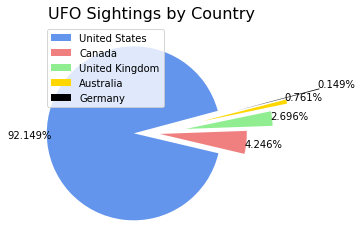

In [ ]:

plt.pie(
        ufo_df['country'].value_counts(), 
        colors = colors,
        explode = expl,
        autopct='%.3f%%', 
        pctdistance=1.2,
        labels = None,
        labeldistance = 10,
        startangle = 15
        )

plt.legend(labels=labels, loc='upper left')
plt.title('UFO Sightings by Country', size=16)

plt.show() 

In [ ]:
ufo = ufo_df.rename(columns={'longitude ':'longitude'}) #correcting typo in the dataframe
ufo.at[43782,'latitude']= 33.2001  #correcting another typo
ufo["latitude"] = ufo.latitude.astype(float)  #setting latitude as a real number


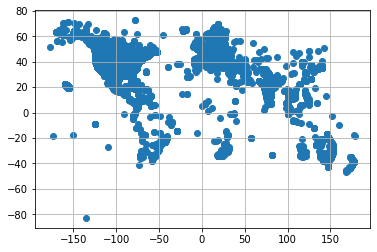

In [ ]:
# check coordinates first
plt.scatter(ufo.longitude, ufo.latitude)
plt.grid()
plt.show()

> Import Folium Library

> This library will be used to create interactive maps

In [ ]:
    import folium
    from folium.plugins import HeatMap

In [ ]:
map = folium.Map(location=[48, -102], zoom_start=2,width='50%', height='60%')

map

In [ ]:
### Interactive Map for each location from the year 2010.

In [ ]:
df_plot_2010 = ufo[ufo.year==2010]
df_plot_2010.shape



(4283, 15)

In [ ]:
df_plot_2010.head()

datetime          city state country  ...  year day hour  Season
212 2010-10-10 01:00:00  orchard park    ny      us  ...  2010  10    1  Autumn
213 2010-10-10 02:30:00    harrisburg    pa      us  ...  2010  10    2  Autumn
214 2010-10-10 03:00:00        euclid    oh      us  ...  2010  10    3  Autumn
215 2010-10-10 08:30:00         starr    sc      us  ...  2010  10    8  Autumn
216 2010-10-10 12:00:00     greenwich    ct      us  ...  2010  10   12  Autumn

[5 rows x 15 columns]

In [ ]:
# interactive map of individual locations
zoom_factor = 3
my_map_2 = folium.Map(location=[36,-120], zoom_start=1, width='50%', height='60%')

for i in range(0,df_plot_2010.shape[0]):
   folium.Circle(
      location=[df_plot_2010.iloc[i]['latitude'], df_plot_2010.iloc[i]['longitude']],
      radius=10000,
      color='purple',
      fill_color='red',
      popup = str.upper(df_plot_2010.iloc[i]['city'])
   ).add_to(my_map_2)
my_map_2 # display